In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/vgames2.csv')

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df['Publisher'] = df['Publisher'].fillna('Unknown')

(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16227.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

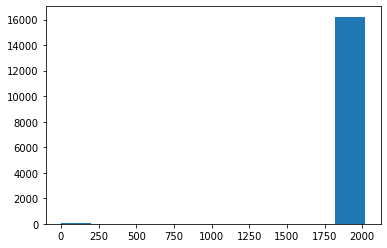

In [ ]:
plt.hist(df['Year'])

In [ ]:
df_year_under_20 = df.query('Year>=0 and Year<=20')
df_year_under_20_idx = df.query('Year>=0 and Year<=20').index
df_year_over_20 = df.query('Year>20 and Year<=250')
df_year_over_20_idx=df.query('Year>20 and Year<=250').index

In [ ]:
for i in df_year_under_20_idx:
    df.loc[i, 'Year'] = 2000 + df['Year'].iloc[i]

for i in df_year_over_20_idx:
    df.loc[i, 'Year'] = 1900 + df['Year'].iloc[i]

In [ ]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [ ]:
for index, value in enumerate(df['NA_Sales']):
    if(value[-1]=='K'):
        df.loc[index,'NA_Sales'] = df.loc[index,'NA_Sales'].replace('K','')
        df.loc[index,'NA_Sales'] = float(df.loc[index,'NA_Sales'])/1000
    elif(value[-1]=='M'):
        df.loc[index,'NA_Sales'] = float(df.loc[index,'NA_Sales'].replace('M',''))

df['NA_Sales'] = df['NA_Sales'].astype(float)

In [ ]:
for index, value in enumerate(df['EU_Sales']):
    if(value[-1]=='K'):
        df.loc[index,'EU_Sales'] = df.loc[index,'EU_Sales'].replace('K','')
        df.loc[index,'EU_Sales'] = float(df.loc[index,'EU_Sales'])/1000
    elif(value[-1]=='M'):
        df.loc[index,'EU_Sales'] = float(df.loc[index,'EU_Sales'].replace('M',''))

df['EU_Sales'] = df['EU_Sales'].astype(float)

In [ ]:
for index, value in enumerate(df['JP_Sales']):
    if(value[-1]=='K'):
        df.loc[index,'JP_Sales'] = df.loc[index,'JP_Sales'].replace('K','')
        df.loc[index,'JP_Sales'] = float(df.loc[index,'JP_Sales'])/1000
    elif(value[-1]=='M'):
        df.loc[index,'JP_Sales'] = float(df.loc[index,'JP_Sales'].replace('M',''))

df['JP_Sales'] = df['JP_Sales'].astype(float)

In [ ]:
for index, value in enumerate(df['Other_Sales']):
    if(value[-1]=='K'):
        df.loc[index,'Other_Sales'] = df.loc[index,'Other_Sales'].replace('K','')
        df.loc[index,'Other_Sales'] = float(df.loc[index,'Other_Sales'])/1000
    elif(value[-1]=='M'):
        df.loc[index,'Other_Sales'] = float(df.loc[index,'Other_Sales'].replace('M',''))

df['Other_Sales'] = df['Other_Sales'].astype(float)

In [ ]:
df.shape

(16598, 9)

In [ ]:
df[df['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.00,0.00
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.00,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0.00,0.00,0.00
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00


In [ ]:
df_ref = pd.read_csv('/content/vgsales.csv')

In [ ]:
df_null_Genre = df[df['Genre'].isnull()].index

In [ ]:
df_null_Genre

Int64Index([   50,   408,  1328,  1582,  1971,  2043,  2497,  3353,  3363,
             3470,  3515,  3932,  4148,  4349,  4545,  4598,  4935,  5668,
             5713,  5945,  6798,  7143,  7336,  7526,  7797,  9488, 10432,
            10501, 10874, 11050, 11063, 11268, 11496, 11668, 11699, 12314,
            12331, 12340, 12870, 12982, 13348, 14930, 15077, 15211, 15426,
            15526, 16091, 16431, 16555, 16587],
           dtype='int64')

In [ ]:
for i in df_null_Genre:
  df_value = df.loc[i,'Name']
  idx = df_ref.query('Name==@df_value').index
  new_genre=df_ref.loc[idx,'Genre']
  for label, content in new_genre.items():
    df.loc[i,'Genre'] = content

In [ ]:
rm_year_null = df[df['Year'].isnull()].index
df = df.drop(rm_year_null)
df = df.reset_index(drop=True)

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16327 non-null  object 
 4   Publisher    16327 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


# 반드시 들어가야하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

휴대용 : DS 3DS PSP GB GBA PSV WS GG WiiU \\
거치용 : Wii GC XB X360 PS PS2 PS3 PS4 2600 NES SNES DC N64 XOne GEN SCD NG TG16 3DO PDFX SAT \\
컴퓨터 : PC

In [ ]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
gen_pref_NA = df.groupby('Genre', as_index=False).NA_Sales.mean()
gen_pref_EU = df.groupby('Genre', as_index=False).EU_Sales.mean()
gen_pref_JP = df.groupby('Genre', as_index=False).JP_Sales.mean()
gen_pref_Other = df.groupby('Genre', as_index=False).Other_Sales.mean()

x = np.array(gen_pref_NA.loc[:,'Genre'])
na_arr = np.array(gen_pref_NA.loc[:,'NA_Sales'])
eu_arr = np.array(gen_pref_EU.loc[:,'EU_Sales'])
jp_arr = np.array(gen_pref_JP.loc[:,'JP_Sales'])
other_arr = np.array(gen_pref_Other.loc[:,'Other_Sales'])

Text(0.5, 1.0, 'Game Sales Mean by genre in Other regions')

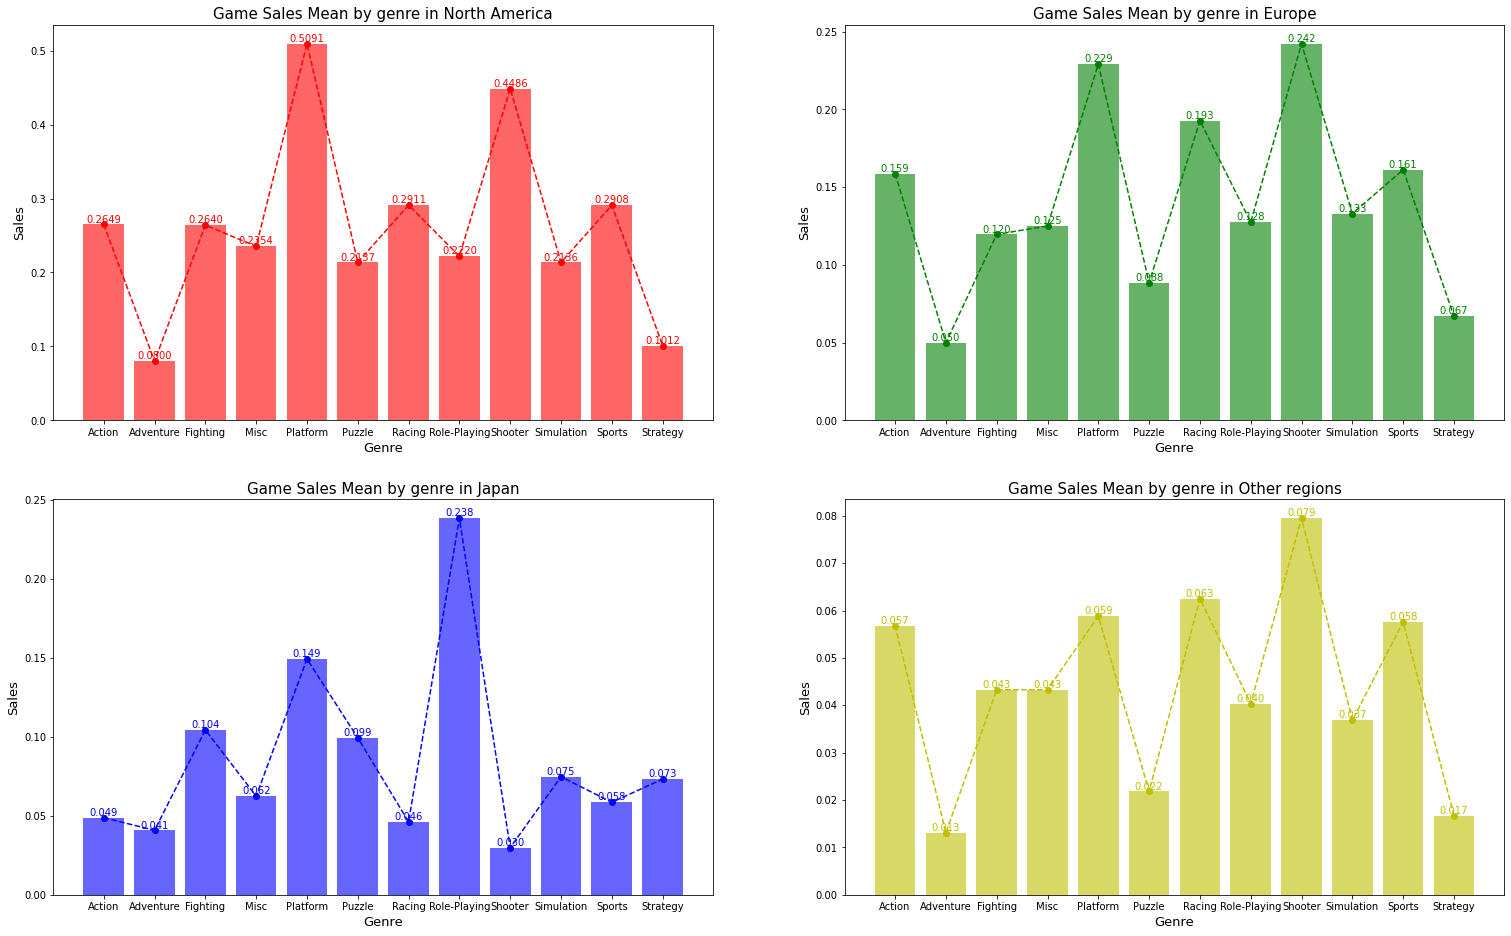

In [ ]:
f, axes = plt.subplots(2, 2)
f.set_size_inches((26, 16))

axes[0][0].bar(x,na_arr,color = 'r', alpha = 0.6)
for i, v in enumerate(x):
    axes[0][0].text(v, na_arr[i], '%.4f' % na_arr[i],color='r',horizontalalignment='center',verticalalignment='bottom')
axes[0][0].plot(x, na_arr, color='r',linestyle='--', marker='o')
axes[0][0].set_xlabel('Genre',fontsize = 13)
axes[0][0].set_ylabel('Sales',fontsize = 13)
axes[0][0].set_title('Game Sales Mean by genre in North America', fontsize = 15)

axes[0][1].bar(x,eu_arr,color = 'g', alpha = 0.6)
for i, v in enumerate(x):
    axes[0][1].text(v, eu_arr[i], '%.3f' % eu_arr[i],color='g',horizontalalignment='center',verticalalignment='bottom')
axes[0][1].plot(x, eu_arr, color='g',linestyle='--', marker='o')
axes[0][1].set_xlabel('Genre',fontsize = 13)
axes[0][1].set_ylabel('Sales',fontsize = 13)
axes[0][1].set_title('Game Sales Mean by genre in Europe', fontsize = 15)

axes[1][0].bar(x,jp_arr,color = 'b', alpha = 0.6)
for i, v in enumerate(x):
    axes[1][0].text(v, jp_arr[i], '%.3f' % jp_arr[i],color='blue',horizontalalignment='center',verticalalignment='bottom')
axes[1][0].plot(x, jp_arr, color='b',linestyle='--', marker='o')
axes[1][0].set_xlabel('Genre',fontsize = 13)
axes[1][0].set_ylabel('Sales',fontsize = 13)
axes[1][0].set_title('Game Sales Mean by genre in Japan', fontsize = 15)

axes[1][1].bar(x,other_arr,color = 'y', alpha = 0.6)
for i, v in enumerate(x):
    axes[1][1].text(v, other_arr[i], '%.3f' % other_arr[i],color='y',horizontalalignment='center',verticalalignment='bottom')
axes[1][1].plot(x, other_arr, color='y',linestyle='--', marker='o')
axes[1][1].set_xlabel('Genre',fontsize = 13)
axes[1][1].set_ylabel('Sales',fontsize = 13)
axes[1][1].set_title('Game Sales Mean by genre in Other regions', fontsize = 15)


In [ ]:
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
new_year1 = df.query('(Year>=1980) and (Year<=1990)').index
new_year2 = df.query('(Year>=1991) and (Year<=2000)').index
new_year3 = df.query('(Year>=2001) and (Year<=2010)').index
new_year4 = df.query('(Year>=2011) and (Year<=2020)').index

In [ ]:
for i in new_year1:
  df.loc[i,'Interval_Vear'] = '1980-1990'

for i in new_year2:
  df.loc[i,'Interval_Vear'] = '1991-2000'

for i in new_year3:
  df.loc[i,'Interval_Vear'] = '2001-2010'

for i in new_year4:
  df.loc[i,'Interval_Vear'] = '2011-2020'

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [ ]:
for i in range(df.shape[0]):
  if(df.loc[i,'Platform']=='DS' or df.loc[i,'Platform']=='3DS' or df.loc[i,'Platform']=='PSP' or df.loc[i,'Platform']=='GB' or df.loc[i,'Platform']=='GBA' or df.loc[i,'Platform']=='PSV' or df.loc[i,'Platform']=='WS' or df.loc[i,'Platform']=='GG' or df.loc[i,'Platform']=='WiiU'):
    df.loc[i,'Platform_Classification']='portable'
  elif(df.loc[i,'Platform']=='PC'):
    df.loc[i,'Platform_Classification']='pc'
  else:
    df.loc[i,'Platform_Classification']='stationary'


In [ ]:
total_sales = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df['Total_Sales']=total_sales

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Interval_Vear,Platform_Classification,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,2001-2010,portable,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2001-2010,stationary,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,2001-2010,portable,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,2001-2010,portable,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,2001-2010,stationary,0.25


In [ ]:
df_platform_class = df.groupby(['Interval_Vear','Platform_Classification'],as_index=False).Total_Sales.mean()
df_platform_class

,Interval_Vear,Platform_Classification,Total_Sales
0,1980-1990,pc,0.035000
1,1980-1990,portable,4.754000
2,1980-1990,stationary,1.737598
3,1991-2000,pc,1.213556
4,1991-2000,portable,2.217089
5,1991-2000,stationary,0.607295
6,2001-2010,pc,0.198305
7,2001-2010,portable,0.372888
8,2001-2010,stationary,0.601395
9,2011-2020,pc,0.257278


In [ ]:
df_platform_pc = df_platform_class.query('Platform_Classification=="pc"')
df_platform_port = df_platform_class.query('Platform_Classification=="portable"')
df_platform_stat = df_platform_class.query('Platform_Classification=="stationary"')

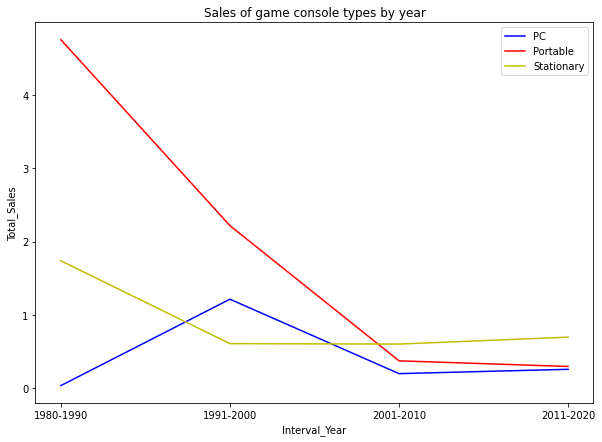

In [ ]:
x_arr = np.array(df_platform_pc['Interval_Vear'])
y_arr = np.array(df_platform_pc['Total_Sales'])

x_arr2 = np.array(df_platform_port['Interval_Vear'])
y_arr2 = np.array(df_platform_port['Total_Sales'])

x_arr3 = np.array(df_platform_stat['Interval_Vear'])
y_arr3 = np.array(df_platform_stat['Total_Sales'])

plt.figure(figsize=(10,7))
plt.plot(x_arr, y_arr, color='b',label='PC')
plt.plot(x_arr2, y_arr2, color='r',label='Portable')
plt.plot(x_arr3, y_arr3, color='y',label='Stationary')
plt.title('Sales of game console types by year')
plt.xlabel('Interval_Year')
plt.ylabel('Total_Sales')
plt.legend()
plt.show()

In [ ]:
df_pivot = df.groupby(['Genre','Year'],as_index=False).Total_Sales.mean()
df_pivot = df_pivot.pivot('Genre', 'Year', 'Total_Sales')

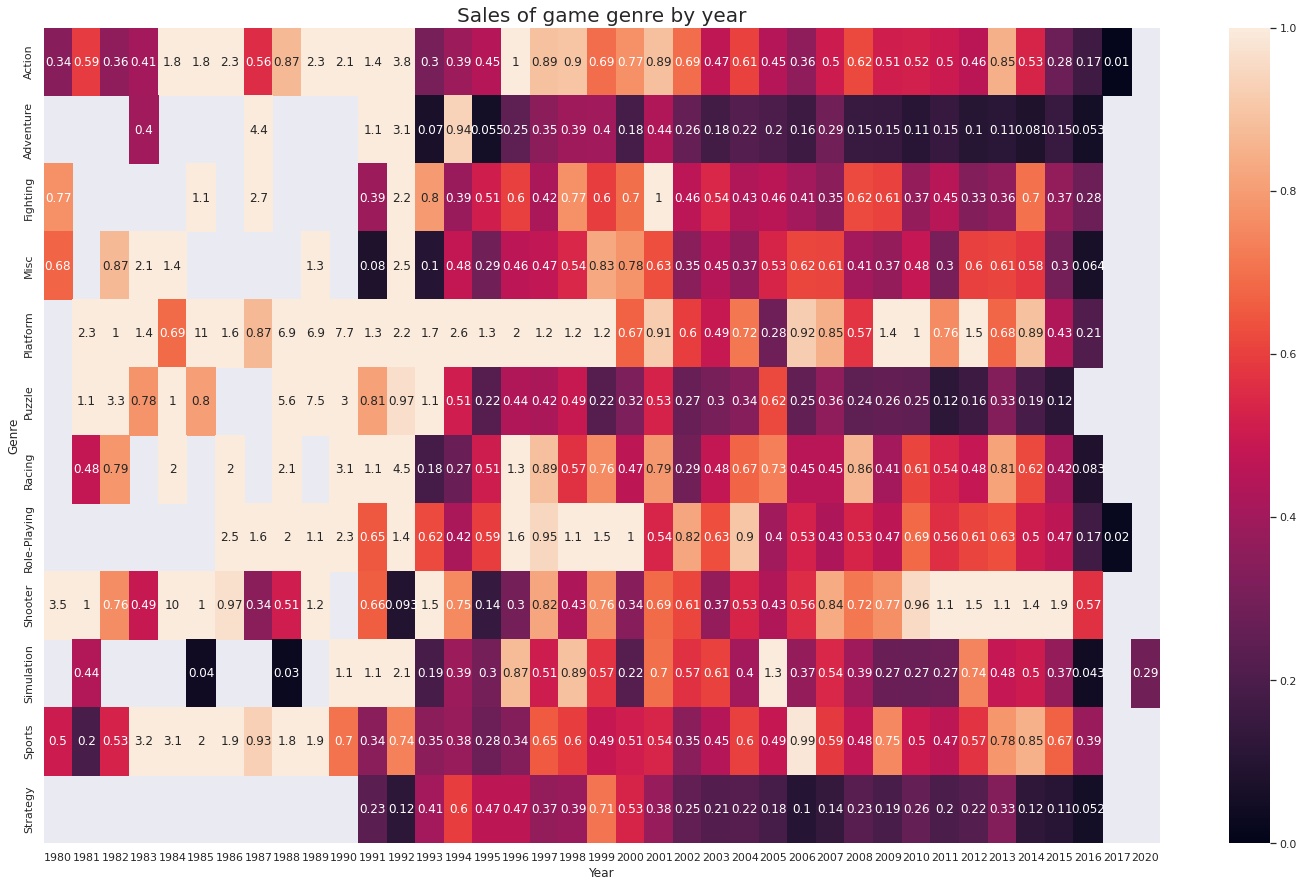

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(df_pivot, annot=True, vmin=0, vmax=1)
plt.title('Sales of game genre by year', fontsize=20)
plt.show()

In [ ]:
df['Platform'].value_counts()

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Interval_Vear',
       'Platform_Classification', 'Total_Sales'],
      dtype='object')

In [ ]:
df_sort_sales_game = df.loc[:,['Name','Platform','Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
df_sorted_by_values = df_sort_sales_game.sort_values(by='Total_Sales' ,ascending=False)
df_sorted_by_values = df_sorted_by_values.reset_index(drop=True)
df_sorted_by_values1 = df_sorted_by_values.iloc[0:10]

In [ ]:
df_sorted_by_values2 = df_sorted_by_values.iloc[0:100]

In [ ]:
labels=[]
contents=[]

for label, content in df_sorted_by_values2['Platform'].value_counts().items():
    labels.append(label)
    contents.append(content*100)

In [ ]:
labels2=[]
contents2=[]

for label, content in df_sorted_by_values2['Genre'].value_counts().items():
    labels2.append(label)
    contents2.append(content*100)

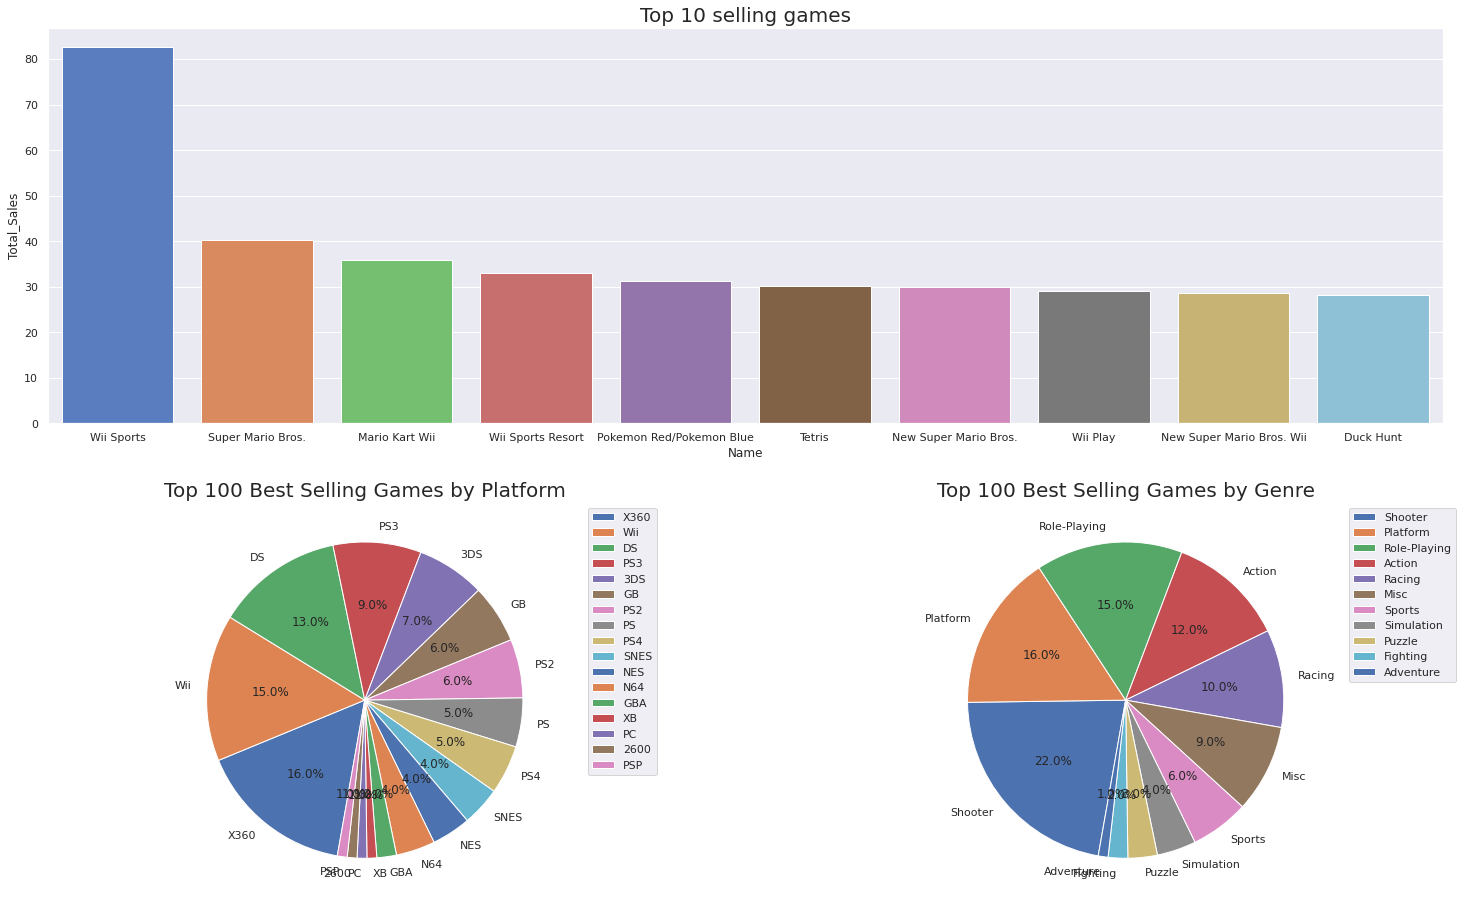

In [ ]:
plt.figure(figsize=(25,16))

plt.subplot(211)
plt.title('Top 10 selling games', fontsize=20)
sns.barplot(x='Name', y='Total_Sales', data=df_sorted_by_values1, palette='muted')

plt.subplot(223)
plt.pie(contents, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Top 100 Best Selling Games by Platform', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.subplot(224)
plt.pie(contents2, labels=labels2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Top 100 Best Selling Games by Genre', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Interval_Vear,Platform_Classification,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,2001-2010,portable,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2001-2010,stationary,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,2001-2010,portable,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,2001-2010,portable,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,2001-2010,stationary,0.25


In [ ]:
df_cluster = df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_cluster.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [ ]:
sse = {}

for k in range(1,20):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(df_cluster_scaled)
  sse[k] = kmeans.inertia_

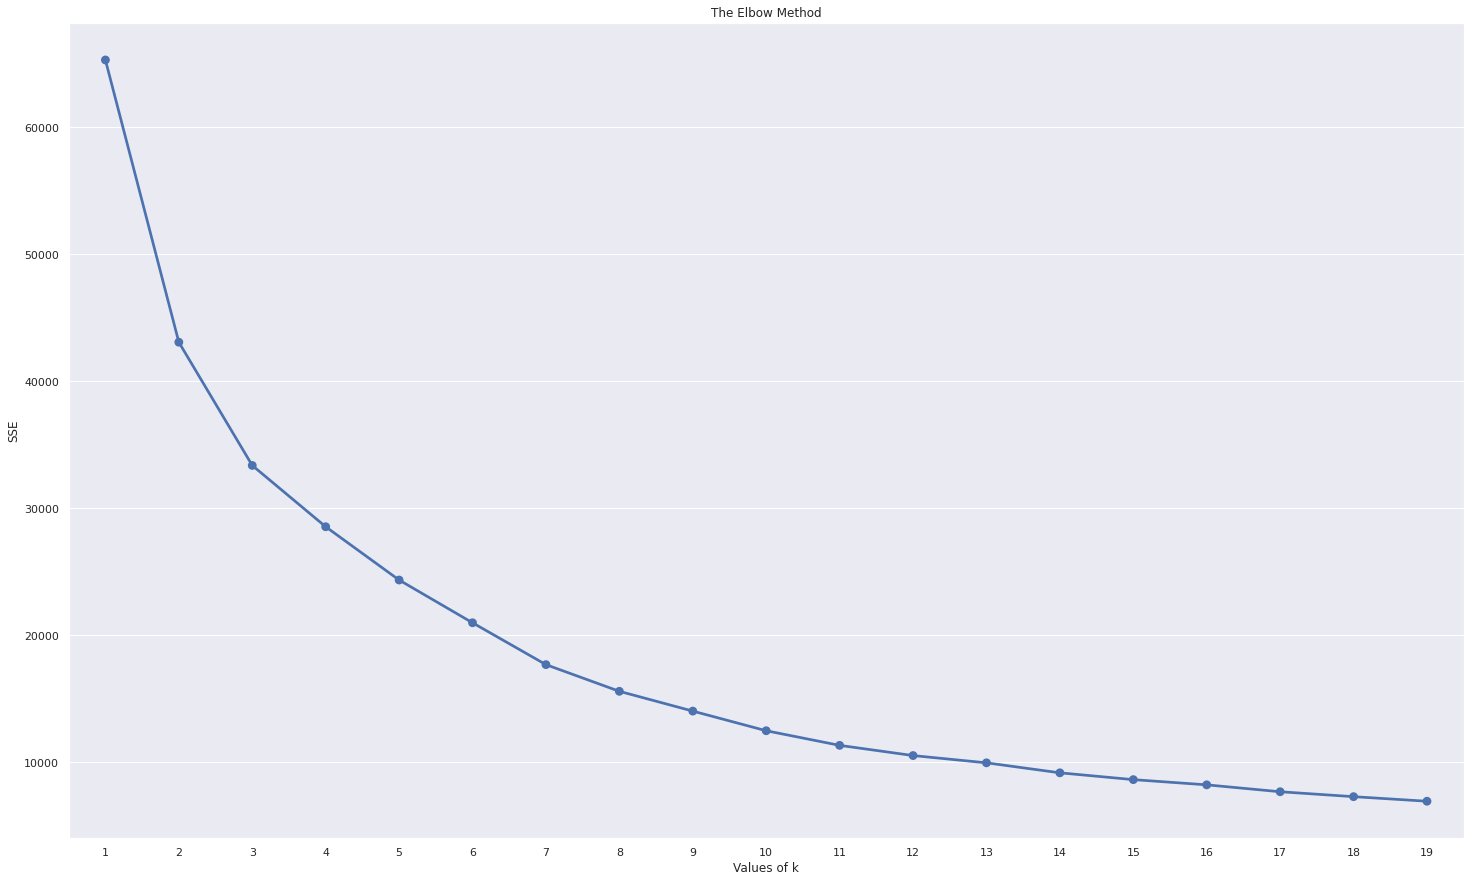

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(df_cluster_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

df_cluster = df_cluster.assign(Cluster = cluster_labels)

In [ ]:
df_cluster.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
0,0.04,0.00,0.00,0.00,0
1,0.17,0.00,0.00,0.01,0
2,0.00,0.00,0.02,0.00,0
3,0.04,0.00,0.00,0.00,0
4,0.12,0.09,0.00,0.04,0


In [ ]:
df_cluster.groupby('Cluster').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Cluster,,,,
0,0.175978,0.086815,0.052758,0.028155
1,11.215714,6.461714,3.511714,2.215714
2,2.079965,1.449539,0.587979,0.476312


Text(0.5, 1.0, 'The cluster with the highest sales')

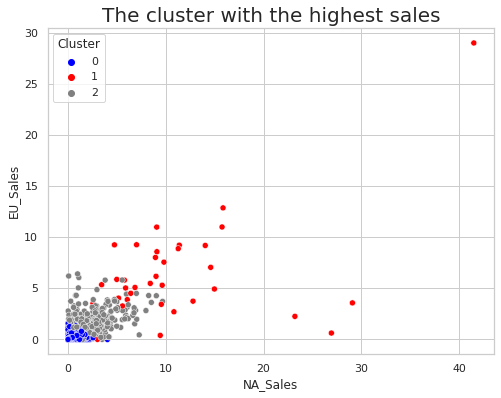

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.scatterplot(data=df_cluster, x="NA_Sales", y="EU_Sales", hue="Cluster",palette=sns.blend_palette(['blue','red','gray'],3))
plt.title('The cluster with the highest sales', fontsize=20)

In [ ]:
#import matplotlib.pyplot as plt
##from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure(figsize = (13,10))
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs = df_cluster.NA_Sales, ys = df_cluster.EU_Sales, zs = df_cluster.JP_Sales, c=df_cluster.Cluster)

#plt.show()

In [ ]:
df_cluster_idx=df_cluster.query('Cluster==1').index

In [ ]:
df_cluster_res = df.iloc[df_cluster_idx]
df_cluster_res

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Interval_Vear,Platform_Classification,Total_Sales
506,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,2001-2010,portable,15.30
995,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,2001-2010,stationary,14.97
1190,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,1980-1990,portable,30.26
1946,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,2011-2020,portable,14.35
2867,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,2001-2010,stationary,82.74
2971,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,2001-2010,stationary,29.01
3223,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,2001-2010,portable,12.28
3300,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,2001-2010,stationary,33.00
3382,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,2001-2010,stationary,22.72
3430,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,2011-2020,stationary,21.39


In [ ]:
df_cluster_res.value_counts('Platform')

Platform
DS      8
Wii     7
GB      5
PS2     4
NES     3
PS3     2
X360    2
3DS     1
GBA     1
PS4     1
SNES    1
dtype: int64

In [ ]:
df_cluster_res.value_counts('Publisher')

Publisher
Nintendo                       26
Take-Two Interactive            4
Activision                      2
Sony Computer Entertainment     2
Microsoft Game Studios          1
dtype: int64

In [ ]:
df_cluster_res.value_counts('Genre')

Genre
Role-Playing    7
Platform        6
Action          4
Racing          4
Sports          4
Misc            3
Shooter         3
Puzzle          2
Simulation      2
dtype: int64

In [ ]:
df_cluster_res.value_counts('Platform_Classification')

Platform_Classification
stationary    20
portable      15
dtype: int64

Text(0.5, 0.98, 'Classification of Clusters 1 by column')

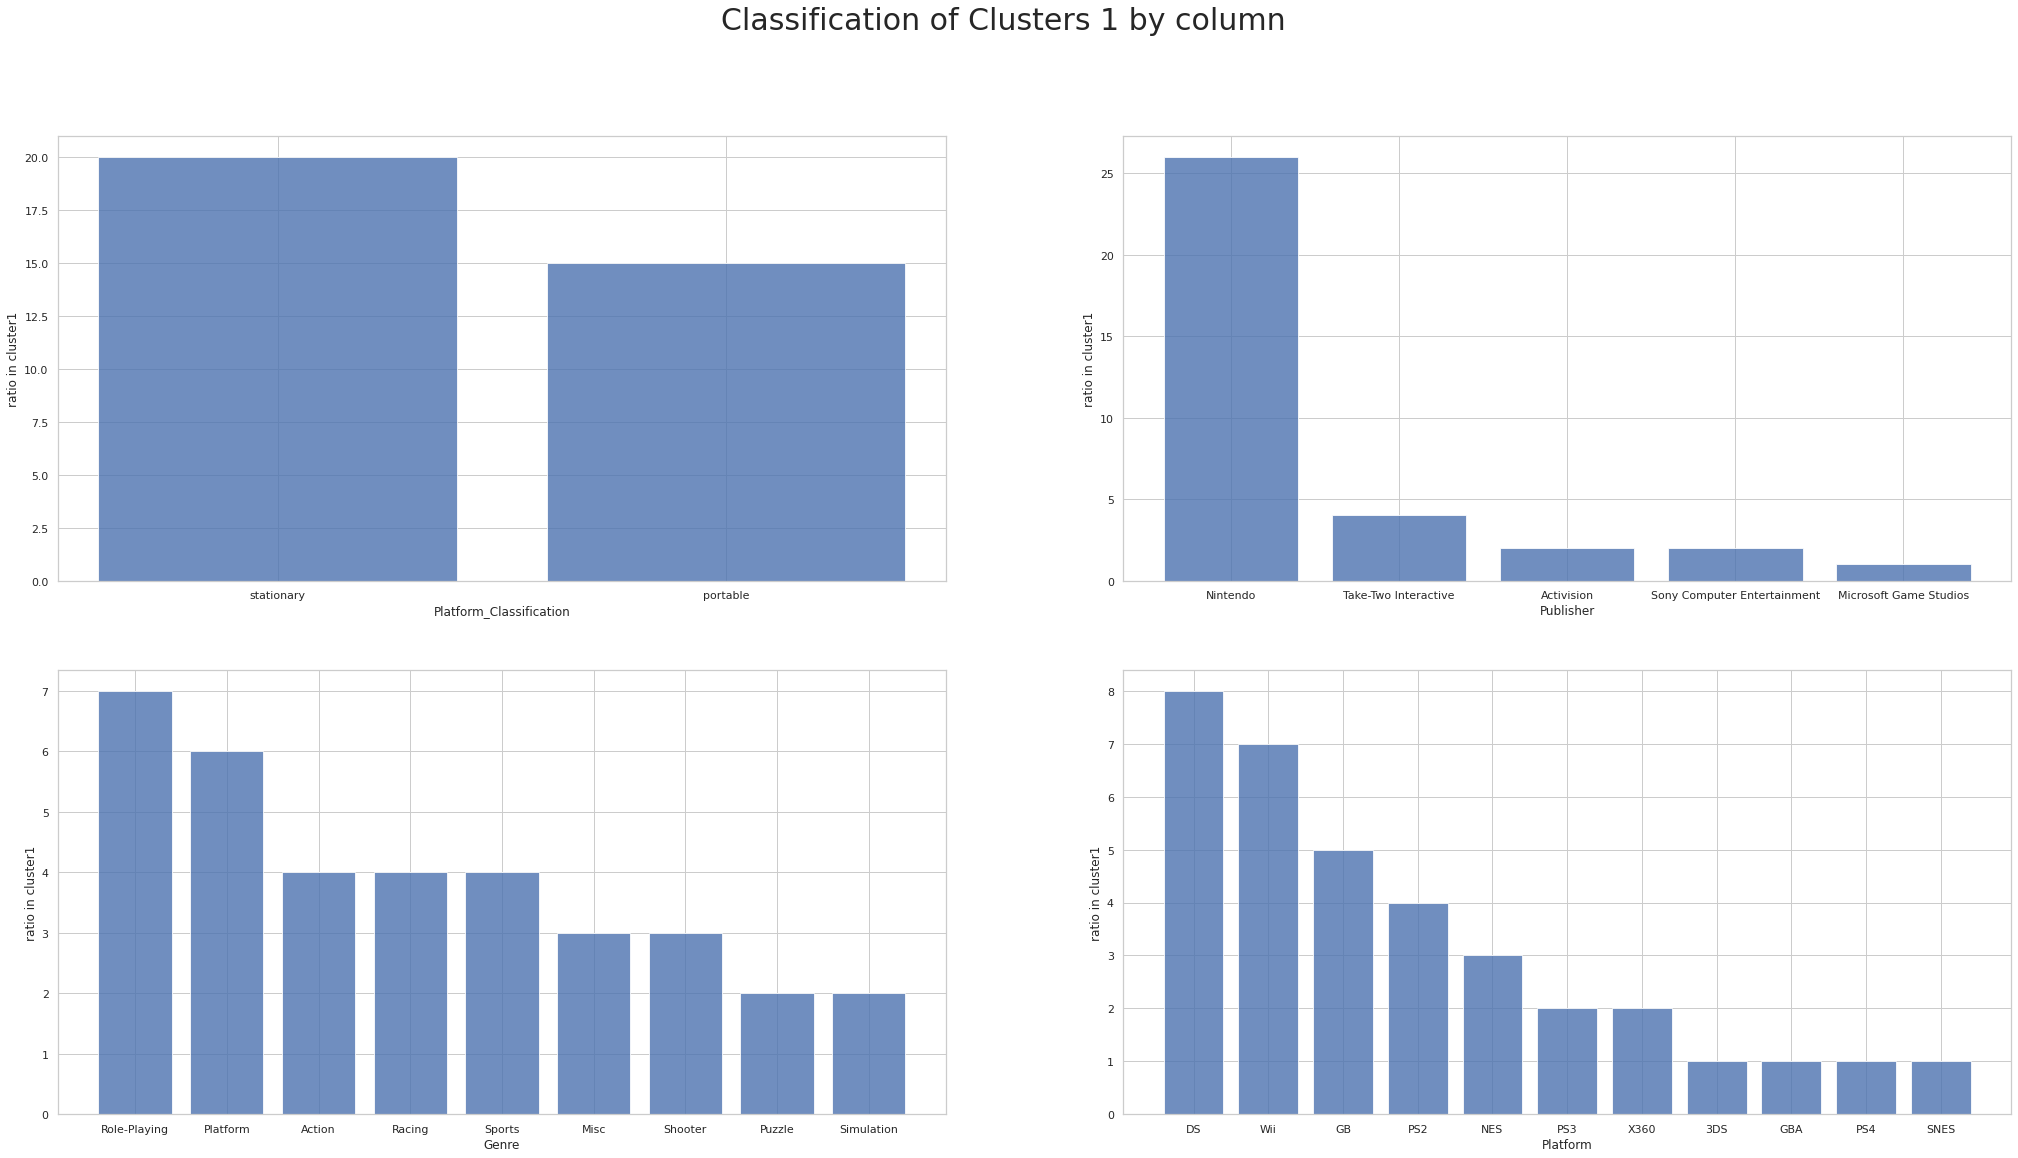

In [ ]:
labels=[]
contents=[]

labels1=[]
contents1=[]

labels2=[]
contents2=[]

labels3=[]
contents3=[]

for label, content in df_cluster_res.value_counts('Platform_Classification').items():
    labels.append(label)
    contents.append(content)

for label1, content1 in df_cluster_res.value_counts('Publisher').items():
    labels1.append(label1)
    contents1.append(content1)

for label2, content2 in df_cluster_res.value_counts('Genre').items():
    labels2.append(label2)
    contents2.append(content2)

for label3, content3 in df_cluster_res.value_counts('Platform').items():
    labels3.append(label3)
    contents3.append(content3)

plt.figure(figsize=(35,18))

plt.subplot(221)
plt.bar(labels,contents,alpha=0.8)
plt.xlabel("Platform_Classification") 
plt.ylabel("ratio in cluster1") 

plt.subplot(222)
plt.bar(labels1,contents1,alpha=0.8)
plt.xlabel("Publisher")
plt.ylabel("ratio in cluster1")

plt.subplot(223)
plt.bar(labels2,contents2,alpha=0.8)
plt.xlabel("Genre")
plt.ylabel("ratio in cluster1")

plt.subplot(224)
plt.bar(labels3,contents3,alpha=0.8)
plt.xlabel("Platform")
plt.ylabel("ratio in cluster1")

plt.suptitle('Classification of Clusters 1 by column',fontsize=30)

In [ ]:
df = df.assign(Cluster = cluster_labels)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     16327 non-null  object 
 1   Platform                 16327 non-null  object 
 2   Year                     16327 non-null  int64  
 3   Genre                    16327 non-null  object 
 4   Publisher                16327 non-null  object 
 5   NA_Sales                 16327 non-null  float64
 6   EU_Sales                 16327 non-null  float64
 7   JP_Sales                 16327 non-null  float64
 8   Other_Sales              16327 non-null  float64
 9   Interval_Vear            16327 non-null  object 
 10  Platform_Classification  16327 non-null  object 
 11  Total_Sales              16327 non-null  float64
 12  Cluster                  16327 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 1.6+ MB


In [ ]:
df_res=df.query('Platform_Classification=="stationary"')

In [ ]:
df_res=df_res.query('Genre=="Platform"')

In [ ]:
df_res.sort_values(by='Total_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Interval_Vear,Platform_Classification,Total_Sales,Cluster
4133,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,1980-1990,stationary,40.24,1
16260,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,2001-2010,stationary,28.61,1
12903,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,1980-1990,stationary,20.62,1
14614,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,1980-1990,stationary,17.28,1
6353,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,1991-2000,stationary,11.90,2
12207,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,2001-2010,stationary,11.52,2
2964,Super Mario All-Stars,SNES,1993,Platform,Nintendo,5.99,2.15,2.12,0.29,1991-2000,stationary,10.55,2
7017,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,1991-2000,stationary,9.30,2
16244,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,2001-2010,stationary,7.70,2
1085,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,1991-2000,stationary,7.57,2
